In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import folium

from folium import plugins
from folium.plugins import HeatMap

from sklearn.preprocessing import LabelEncoder
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

dframe = pd.read_csv('./listings.csv')
dframe2= pd.read_csv('./reviews.csv')

#lets have a look at the data
dframe.tail(50)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4163,48584984,https://www.airbnb.com/rooms/48584984,20210318170758,2021-03-20,Newly Renovated Family Home with Office,You'll love this spaciously renovated classic ...,Within two blocks of this home are great coffe...,https://a0.muscache.com/pictures/6ad2ca69-36c0...,12300013,https://www.airbnb.com/users/show/12300013,...,NaN,NaN,NaN,STR-OPLI-21-000181,f,1,1,0,0,NaN
4164,48589340,https://www.airbnb.com/rooms/48589340,20210318170758,2021-03-19,Hip Apartment in Desirable Capitol Hill #102,"Private apartment with full size bed, full kit...",Capitol Hill is Seattle's vibrant arts neighbo...,https://a0.muscache.com/pictures/b7e051e5-bd9d...,387136201,https://www.airbnb.com/users/show/387136201,...,NaN,NaN,NaN,STR-OPLI-21-000065,t,3,3,0,0,NaN
4165,48591264,https://www.airbnb.com/rooms/48591264,20210318170758,2021-03-19,Spacious Studio in Lower Queen Anne,A beautiful Spacious Studio in a brick buildin...,NaN,https://a0.muscache.com/pictures/f9dc1221-64fb...,99932610,https://www.airbnb.com/users/show/99932610,...,NaN,NaN,NaN,str-opli-19-003192,f,6,6,0,0,NaN
4166,48598582,https://www.airbnb.com/rooms/48598582,20210318170758,2021-03-20,"Chic Downtown 1 BR with Gym, Rooftop, walk to ...",Show up and start living from day one in Seatt...,NaN,https://a0.muscache.com/pictures/1146a440-764c...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,NaN,NaN,t,93,93,0,0,NaN
4167,48598639,https://www.airbnb.com/rooms/48598639,20210318170758,2021-03-19,"Trendy South Lake Union 2BR w/ Gym, BBQ, nr. A...",Show up and start living from day one in Seatt...,This furnished apartment is situated in South ...,https://a0.muscache.com/pictures/f785821b-dcf2...,107434423,https://www.airbnb.com/users/show/107434423,...,NaN,NaN,NaN,NaN,t,93,93,0,0,NaN
4168,48610501,https://www.airbnb.com/rooms/48610501,20210318170758,2021-03-20,Bright 2 bedroom Greenlake Duplex,"Hi there! This home is hosted by Bungalow, and...",The laid-back North College Park location is w...,https://a0.muscache.com/pictures/4b500ee4-36a1...,375204509,https://www.airbnb.com/users/show/375204509,...,NaN,NaN,NaN,NaN,f,14,1,13,0,NaN
4169,48625523,https://www.airbnb.com/rooms/48625523,20210318170758,2021-03-19,Live + Work + Stay + Easy | 1BR in Seattle,Stay for 90+ nights (minimum nights and rates ...,NaN,https://a0.muscache.com/pictures/a4re/floorpla...,359069961,https://www.airbnb.com/users/show/359069961,...,NaN,NaN,NaN,NaN,t,96,96,0,0,NaN
4170,48629485,https://www.airbnb.com/rooms/48629485,20210318170758,2021-03-19,Bright and Modern 1BR Apt Near Green Lake,Bright and newly renovated ground floor apartm...,Quiet and friendly neighborhood with boutique ...,https://a0.muscache.com/pictures/b86a59bd-60cd...,75897682,https://www.airbnb.com/users/show/75897682,...,NaN,NaN,NaN,STR-OPLI-19-001868,f,1,1,0,0,NaN
4171,48634798,https://www.airbnb.com/rooms/48634798,20210318170758,2021-03-19,9 beds 4BR 2BA lake view house upper unit,You will have the entire upper unit on the 2nd...,【NEIGHBORHOOD】<br />The house is located in a ...,https://a0.muscache.com/pictures/d1a70d4b-90e7...,299224265,https://www.airbnb.com/users/show/299224265,...,NaN,NaN,NaN,STR-OPLI-19-002648,t,5,5,0,0,NaN
4172,48641900,https://www.airbnb.com/rooms/48641900,20210318170758,2021-03-19,Brand New 2 B 2B High-rise Condo Downtown Sea...,"Brand new building in the center of Downtown,...",NaN,https://a0.muscache.com/pictures/f68d75f1-aa98...,171175671,https://www.airbnb.com/users/show/171175671,...,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN


In [2]:
dframe2.head(50)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...
5,2318,168472530,2017-07-09,118518041,Kelly,Casa Madrona was a fabulous house and location...
6,2318,174022018,2017-07-24,16683170,John & Tiffany,We stayed at Megan's place for 9 days with 5 k...
7,2318,196029049,2017-09-21,67403539,Amanda,"Lovely, light and beautiful home in a great lo..."
8,2318,209975438,2017-11-06,60787734,Alicia,Megan's house is incredibly comfortable and st...
9,2318,213368742,2017-11-20,26478142,Karen,Megan was very accommodating and their home wa...


In [3]:
#rename the id column so that we can join the datasets later
dframe.rename(columns = {'id':'listing_id'}, inplace = True) 
dframe.head()

,listing_id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20210318170758,2021-04-01,Casa Madrona - Urban Oasis 1 block from the park!,Now booking 30 night Minimum only. Please cont...,Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,10.0,10.0,10.0,STR-OPLI-19-002837,f,2,2,0,0,0.21
1,9419,https://www.airbnb.com/rooms/9419,20210318170758,2021-03-19,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,...,10.0,10.0,10.0,STR-OPLI-19-003039,f,7,0,7,0,1.14
2,9531,https://www.airbnb.com/rooms/9531,20210318170758,2021-03-20,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.37
3,9534,https://www.airbnb.com/rooms/9534,20210318170758,2021-03-19,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.50
4,9596,https://www.airbnb.com/rooms/9596,20210318170758,2021-03-20,"the down home , spacious, central and fab!","We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,https://www.airbnb.com/users/show/14942,...,9.0,10.0,9.0,STR-OPLI-19-002622,f,2,2,0,0,0.82


In [4]:
dframe.shape
#dframe2.shape

(4213, 74)

In [5]:
#count all the nulls values in each column of the listing df
df=pd.merge(dframe, dframe2, on='listing_id', how='outer')
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


description                       317
neighborhood_overview           32208
host_name                       10844
host_since                      10844
host_location                   11273
host_about                      50463
host_response_time              40152
host_response_rate              40152
host_acceptance_rate            31550
host_is_superhost               10844
host_thumbnail_url              10844
host_picture_url                10844
host_neighbourhood              31429
host_listings_count             10844
host_total_listings_count       10844
host_has_profile_pic            10844
host_identity_verified          10844
neighbourhood                   32208
bathrooms                      263192
bathrooms_text                     11
bedrooms                        43578
beds                              101
minimum_minimum_nights              1
maximum_minimum_nights              1
minimum_maximum_nights              1
maximum_maximum_nights              1
minimum_nigh

In [6]:
df.shape

(263192, 79)

In [7]:
#drop the rows that might be problematic later
#drop all null ratings
#Remove the observations with missing comments, as they do not contribute to the review quality

df = df[df['review_scores_rating'].notna()]

#count all the nulls values in each column of the listing df
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


description                       309
neighborhood_overview           31770
host_name                       10810
host_since                      10810
host_location                   11239
host_about                      50170
host_response_time              40043
host_response_rate              40043
host_acceptance_rate            31423
host_is_superhost               10810
host_thumbnail_url              10810
host_picture_url                10810
host_neighbourhood              31375
host_listings_count             10810
host_total_listings_count       10810
host_has_profile_pic            10810
host_identity_verified          10810
neighbourhood                   31770
bathrooms                      262455
bathrooms_text                      7
bedrooms                        43466
beds                               79
calendar_updated               262455
review_scores_accuracy          12654
review_scores_cleanliness       12654
review_scores_checkin           12654
review_score

In [8]:
#we decide that the datasets are complete enough to answer the questions we have

#3 business questions to be answered:
#  which neighbourhoods are the most popular and why?
#  which of the top listings are the best value?
#  who are the best hosts?
    

# First question: which are the popular neighborhoods and why? 
Here we consider only the top 10% of all listings by rating_score; and we extract the common things from reviewer comments which cmake these neighbourhoods popular in the form of a wordcloud

In [9]:
#Question1: which neighbourhoods are popular (i.e. frequently recieves the highest ratings) and why?

#count the number of neighbourhood occurances
df.sort_values(by="neighbourhood_cleansed", ascending=False).value_counts()
df.groupby('neighbourhood_cleansed')

enc = LabelEncoder()
enc.fit(df['neighbourhood_group_cleansed'])
df['neighbourhood_group_cleansed_val'] = enc.transform(df['neighbourhood_group_cleansed'])

#print(df['review_scores_rating'].value_counts())
print(df['neighbourhood_group_cleansed'].value_counts())



Other neighborhoods    58913
Downtown               33190
Capitol Hill           26610
Central Area           22910
Queen Anne             20231
Ballard                19365
West Seattle           19088
Rainier Valley         15322
Beacon Hill            12007
Delridge                6063
Magnolia                5616
Northgate               5537
University District     5224
Cascade                 4445
Lake City               3798
Seward Park             2616
Interbay                1520
Name: neighbourhood_group_cleansed, dtype: int64


We want to present the very best locations in Seattle to narrow down the options for first time travellers


Other neighborhoods    144
Downtown                97
West Seattle            74
Queen Anne              63
Central Area            53
Capitol Hill            53
Ballard                 51
Rainier Valley          46
Cascade                 46
Delridge                38
Beacon Hill             37
Northgate               18
Interbay                16
Magnolia                15
University District     14
Lake City               11
Seward Park              5
Name: neighbourhood_group_cleansed, dtype: int64


/Users/clementfebruary/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[Text(0, 0, 'Downtown'),
 Text(1, 0, 'West Seattle'),
 Text(2, 0, 'Queen Anne'),
 Text(3, 0, 'Central Area'),
 Text(4, 0, 'Capitol Hill'),
 Text(5, 0, 'Ballard'),
 Text(6, 0, 'Rainier Valley'),
 Text(7, 0, 'Cascade'),
 Text(8, 0, 'Delridge'),
 Text(9, 0, 'Beacon Hill'),
 Text(10, 0, 'Northgate'),
 Text(11, 0, 'Interbay'),
 Text(12, 0, 'Magnolia'),
 Text(13, 0, 'University District'),
 Text(14, 0, 'Lake City'),
 Text(15, 0, 'Seward Park')]

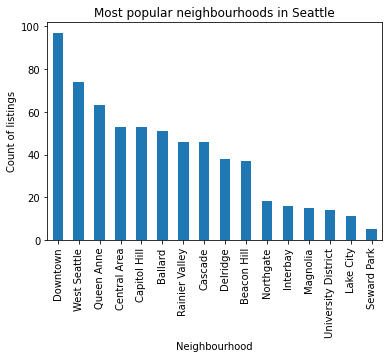

In [10]:
#plot a bar graph showing the most frequently highly rated neigbourhoods in Seattle
df1 = dframe[dframe.review_scores_rating > 99]
print(df1['neighbourhood_group_cleansed'].value_counts())
# Get indexes where name column has value Downtown, Central Area, Queen Anne, Ballard and West Seattle
indexNames = df1[df1['neighbourhood_group_cleansed'] == 'Other neighborhoods'].index
# Delete these row indexes from dataFrame
df1.drop(indexNames , inplace=True)


viz_bar = df1['neighbourhood_group_cleansed'].value_counts().plot(kind='bar')
viz_bar.set_title('Most popular neighbourhoods in Seattle')
viz_bar.set_xlabel('Neighbourhood')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=90)

Question 1 continued: why are these nieghbourhoods popular? 
in other words: What are the words most frequently used to describe the top neighborhoods in Seattle?

In [11]:

#Search all comments for Downtown, Central Area, Queen Anne, Ballard and West Seattle


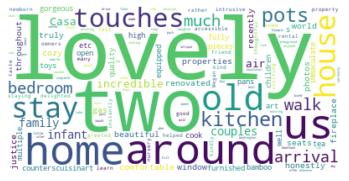

In [12]:
#create a wordcloud for top 5 neighbourhoods
text=df.comments[1]

stopwords = set(STOPWORDS)
stopwords.update(["Seattle","one","way","rented","year","Madrona","visit","bnb","say","chance","set"])


#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("./wordcloud_reviews.png")

In [13]:

######build onto a map of seattle, highlighting the most afforadble, the most reviewed and best balance
#dframe4['neighbourhood_cleansed'].unique()
dframe.sort_values(by=['review_scores_rating','reviews_per_month'],inplace=True, ascending=False)
dframe.drop(dframe[dframe.review_scores_rating < 99].index, inplace=True)
#dframe.head()
#we want to view the top ten hosts
top_host_id = df['listing_id'].value_counts().head(10)
top_host_id

coord = dframe.loc[:,['latitude','longitude']]
coord #use for grid mapping



,latitude,longitude
4081,47.61110,-122.33994
582,47.58360,-122.38686
1224,47.69559,-122.35897
1163,47.62856,-122.34755
1662,47.73179,-122.35271
...,...,...
4208,47.61050,-122.33032
4209,47.61074,-122.33060
4210,47.67995,-122.40076
4211,47.67063,-122.38095


In [14]:
N = len(coord)
loc_array=coord.to_numpy()
label=dframe.loc[:,['price']].to_numpy()

popups = [str(label[i]) for i in range(N)]  # Popups text is the price for the location.
seattle_map = folium.Map([47.53, -122.3], zoom_start=10.8)
plugins.MarkerCluster(loc_array, popups=popups).add_to(seattle_map)
#seattle_map.create_map(path='map.html')
seattle_map.save('locations_map.png')
display(seattle_map)

#Second Question
Which of the top venues are the best value? we derive this by working out a price/ratings value, sorting the list and graphing them out.

In [15]:
#Convert the 'price' column to a float type 
df['price'] = df['price'].map(lambda x: x.lstrip('$')) 
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dtypes

listing_id                            int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
date                                 object
reviewer_id                         float64
reviewer_name                        object
comments                             object
neighbourhood_group_cleansed_val      int64
Length: 80, dtype: object

In [16]:
df['price'].dtypes
df['review_scores_rating'].dtypes
df.columns

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'cale

In [17]:
#create a new column 'rating_factor' to calculate "bang for buck"
sorted_df = df[['listing_id','host_name','listing_url','review_scores_value','reviews_per_month','price']].copy()

for i in range(len(sorted_df)):
    sorted_df['rating_factor']=df['review_scores_value'].astype(float)/df['price']
sorted_df.groupby('host_name').nunique()



,listing_id,listing_url,review_scores_value,reviews_per_month,price,rating_factor
host_name,,,,,,
A-Team,4,4,2,4,4,4
A.C.,1,1,1,1,1,1
A.K.,1,1,1,1,1,1
Aaron,4,4,1,4,4,4
Abby,1,1,1,1,1,1
...,...,...,...,...,...,...
Zeus,60,60,6,29,43,50
Zia,1,1,1,1,1,1
Zoe,1,1,1,1,1,1


In [18]:
#Question 3: Who are the best hosts? (top 10)

In [19]:
#We are looking for the host_id's with the highest ratings
#sort by ratings, highest to lowest

top_df=sorted_df.groupby('host_name').agg('nunique')
#top_df=sorted_df.groupby('listing_id').agg('nunique')
top_df.sort_values(['rating_factor','listing_url','host_name'], ascending=False).rating_factor.nlargest()
gr_df = top_df.nlargest(10,'rating_factor')

plotting...


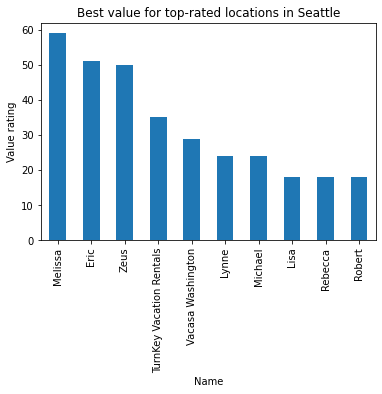

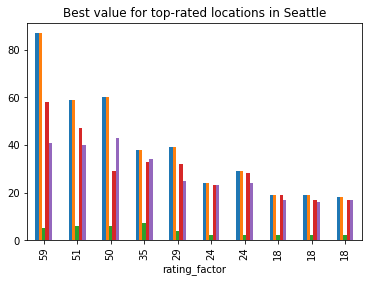

In [20]:
#graph out the top listings as a funsiton of rating_factor

viz_bar = gr_df['rating_factor'].plot(kind='bar')
viz_bar.set_title('Best value for top-rated locations in Seattle')
viz_bar.set_xlabel('Name')
viz_bar.set_ylabel('Value rating')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=90)


def clean_and_plot(dfx, title='Best value for top-rated locations in Seattle', plot=True):
    graph_df = dfx
    graph_df.set_index('rating_factor', inplace=True)
    if plot:
        print("plotting...")
        (graph_df).plot(kind='bar', legend=None)
        plt.title(title);
        plt.show()
    else:
        print("not plotting")
    props_graph_df = graph_df/graph_df.sum()
    return props_graph_df
    
props_df = clean_and_plot(gr_df)
